<a href="https://colab.research.google.com/github/dakshayani2906/Data-Science-Portfolio/blob/main/Show_Time_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Loading the dataset

data = pd.read_csv("ottdata.csv")

In [39]:
data.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [40]:
data.shape

(1000, 8)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [42]:
data.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


In [43]:
unique_counts = data.nunique()
unique_counts

,0
visitors,56
ad_impressions,80
major_sports_event,2
genre,8
dayofweek,7
season,4
views_trailer,799
views_content,61


In [44]:
# checking for duplicate values
data.duplicated().sum()

np.int64(0)

In [45]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

In [46]:
# Check missing values
print(df.isnull().sum())

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64


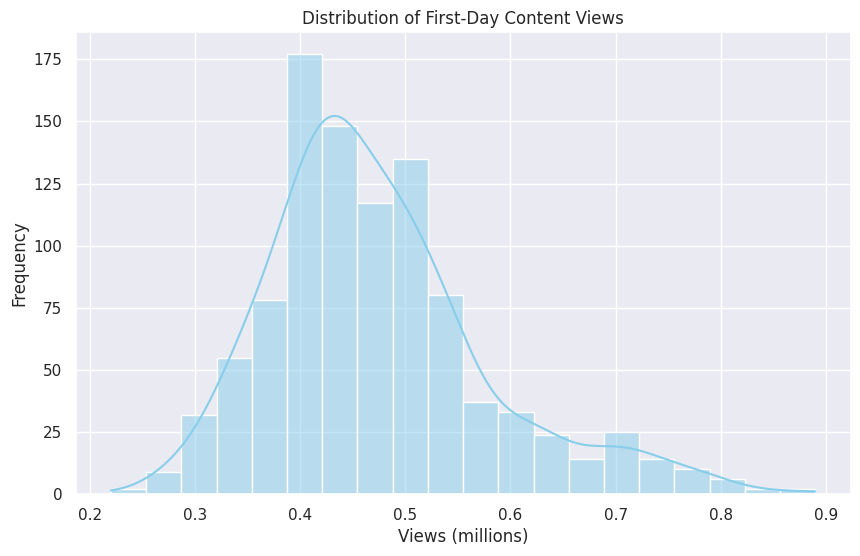

In [47]:
# 1. Distribution of content views
plt.figure(figsize=(10, 6))
sns.histplot(df['views_content'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of First-Day Content Views')
plt.xlabel('Views (millions)')
plt.ylabel('Frequency')
plt.show()

The distribution is slightly right-skewed.

Most content receives around 0.4–0.5 million views on Day 1.

Some content hits as high as ~0.9 million, indicating outliers or blockbusters.

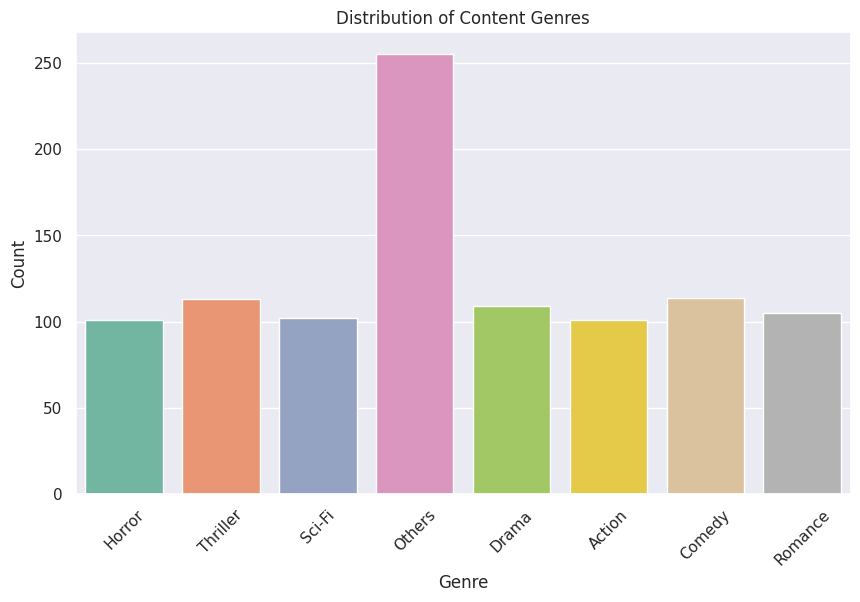

In [48]:
# 2. Distribution of genres
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='genre', palette='Set2')
plt.title('Distribution of Content Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The "Others" category dominates, possibly a mix of less common genres.

Mainstream genres like Comedy, Thriller, and Drama are nearly equal in count.

You may consider grouping or rebalancing genre categories if needed.

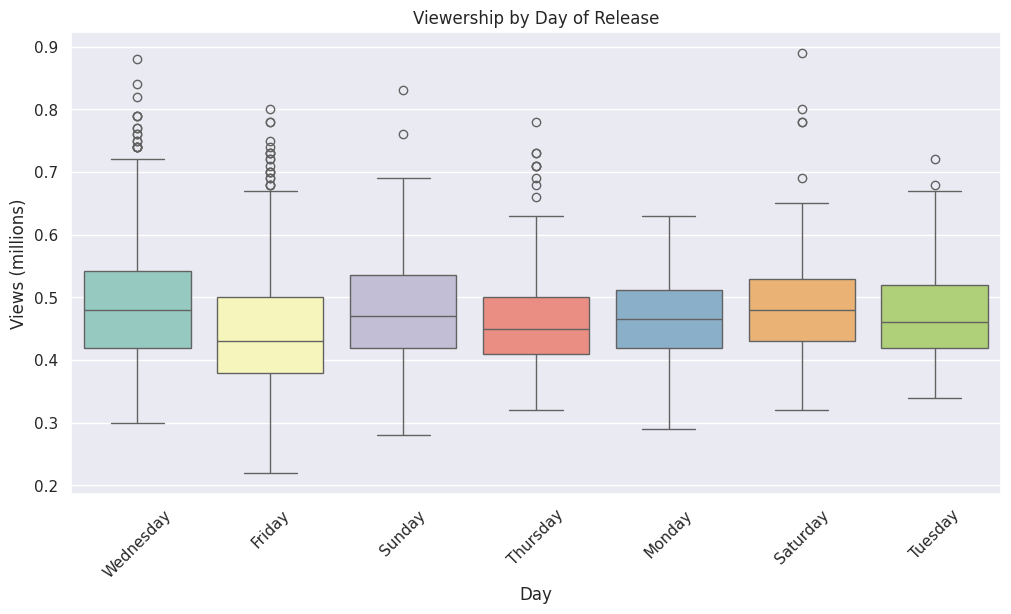

In [49]:
# 3. Viewership by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='dayofweek', y='views_content', palette='Set3')
plt.title('Viewership by Day of Release')
plt.xlabel('Day')
plt.ylabel('Views (millions)')
plt.xticks(rotation=45)
plt.show()

Weekends like Saturday and Sunday tend to have slightly higher median views.

However, high-performing content exists across all days.

Outliers show very popular content released on Wednesdays and Saturdays too.

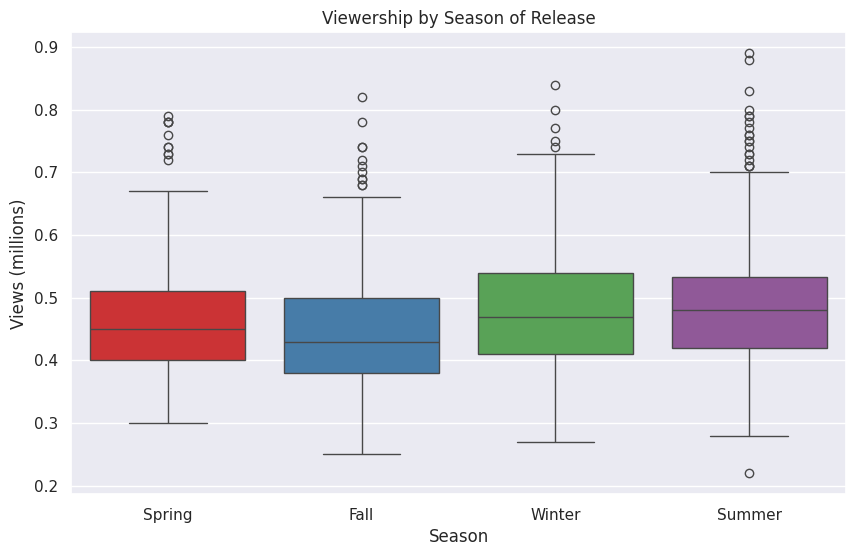

In [50]:
# 4. Viewership by season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='views_content', palette='Set1')
plt.title('Viewership by Season of Release')
plt.xlabel('Season')
plt.ylabel('Views (millions)')
plt.show()

Winter and Summer releases show slightly higher median first-day views.

These may align with vacation/holiday seasons, when people consume more OTT content.

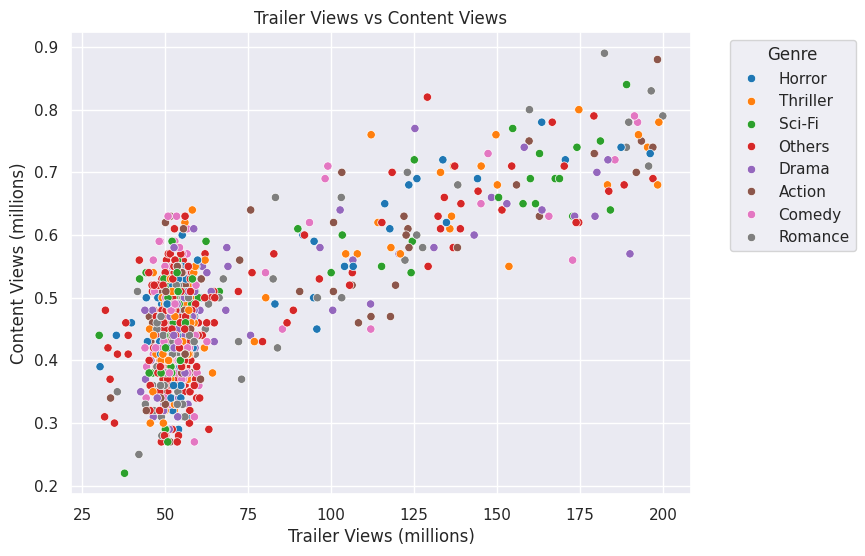

In [51]:
# 5. Correlation between trailer views and content views
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='views_trailer', y='views_content', hue='genre', palette='tab10')
plt.title('Trailer Views vs Content Views')
plt.xlabel('Trailer Views (millions)')
plt.ylabel('Content Views (millions)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

There's a strong positive correlation: content with more trailer views tends to get more first-day views.

This is a valuable driver variable for modeling!



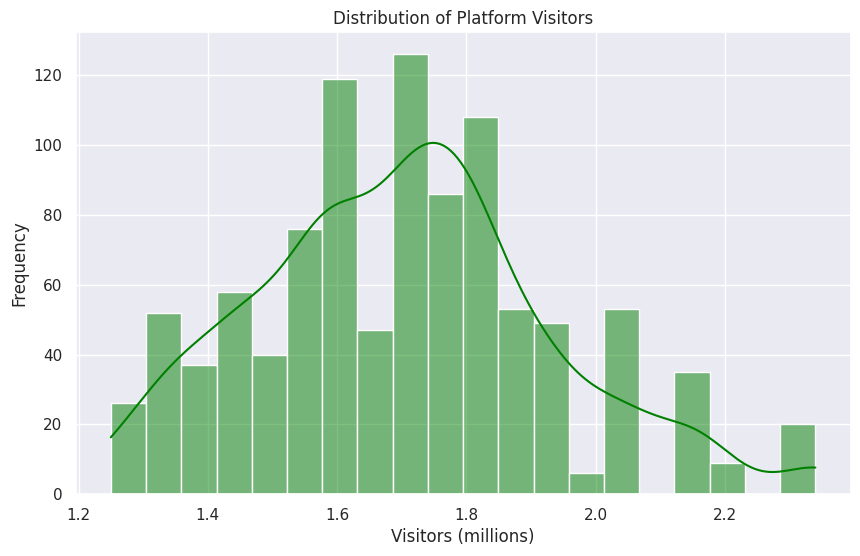

In [52]:
# 6. Distribution of visitors
plt.figure(figsize=(10, 6))
sns.histplot(df['visitors'], bins=20, kde=True, color='green')
plt.title('Distribution of Platform Visitors')
plt.xlabel('Visitors (millions)')
plt.ylabel('Frequency')
plt.show()

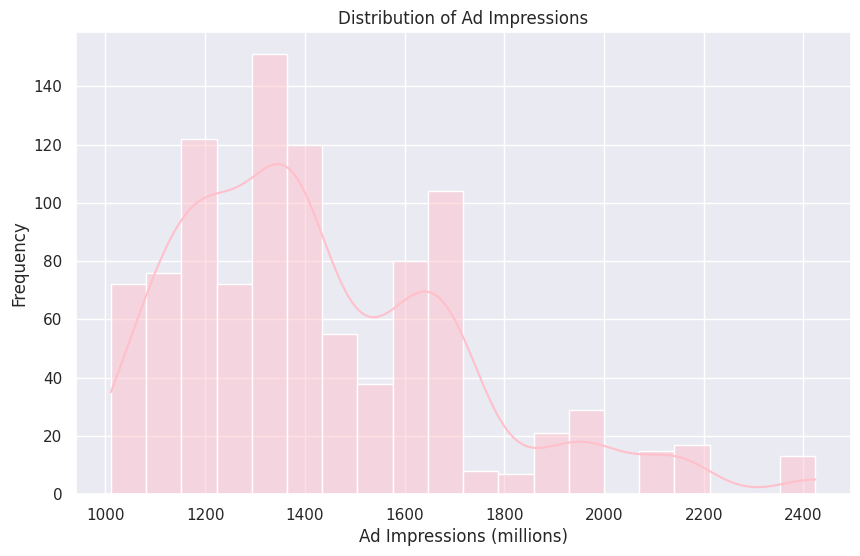

In [53]:
# 7. Distribution of ad impressions
plt.figure(figsize=(10, 6))
sns.histplot(df['ad_impressions'], bins=20, kde=True, color='pink')
plt.title('Distribution of Ad Impressions')
plt.xlabel('Ad Impressions (millions)')
plt.ylabel('Frequency')
plt.show()

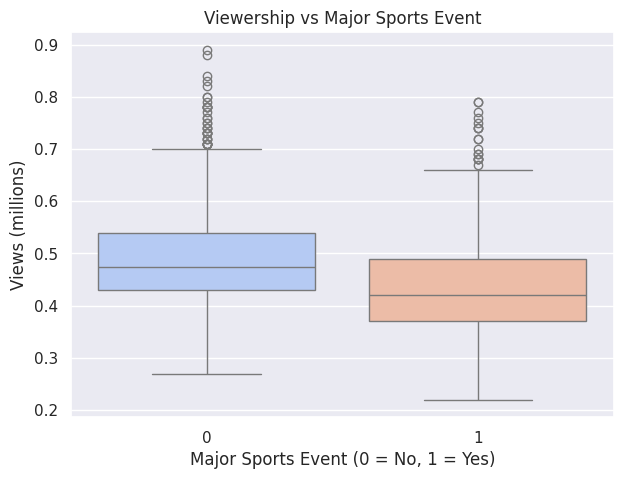

In [54]:
# 8. Viewership variation by major sports event
plt.figure(figsize=(7, 5))
sns.boxplot(x='major_sports_event', y='views_content', data=df, palette='coolwarm')
plt.title('Viewership vs Major Sports Event')
plt.xlabel('Major Sports Event (0 = No, 1 = Yes)')
plt.ylabel('Views (millions)')
plt.show()

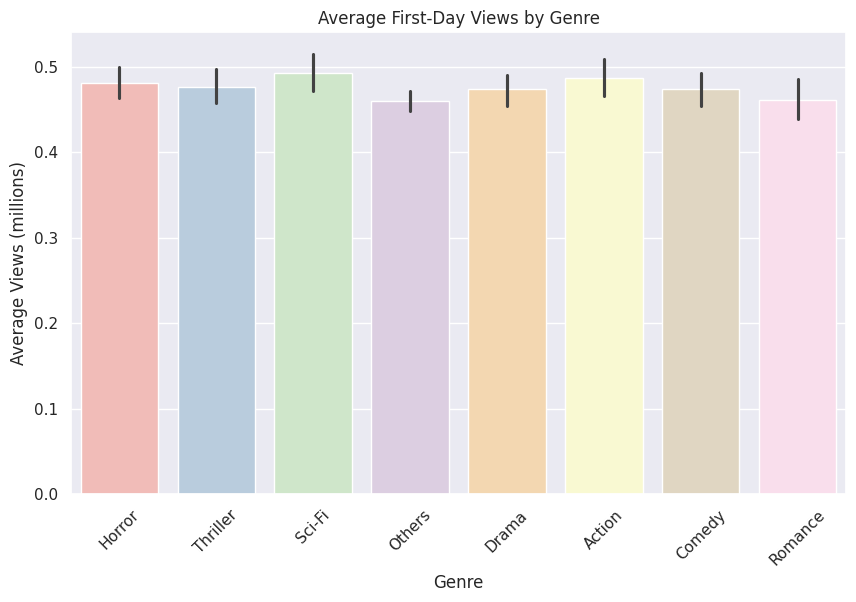

In [55]:
# 9. Average views per genre
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='genre', y='views_content', estimator=np.mean, palette='Pastel1')
plt.title('Average First-Day Views by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Views (millions)')
plt.xticks(rotation=45)
plt.show()

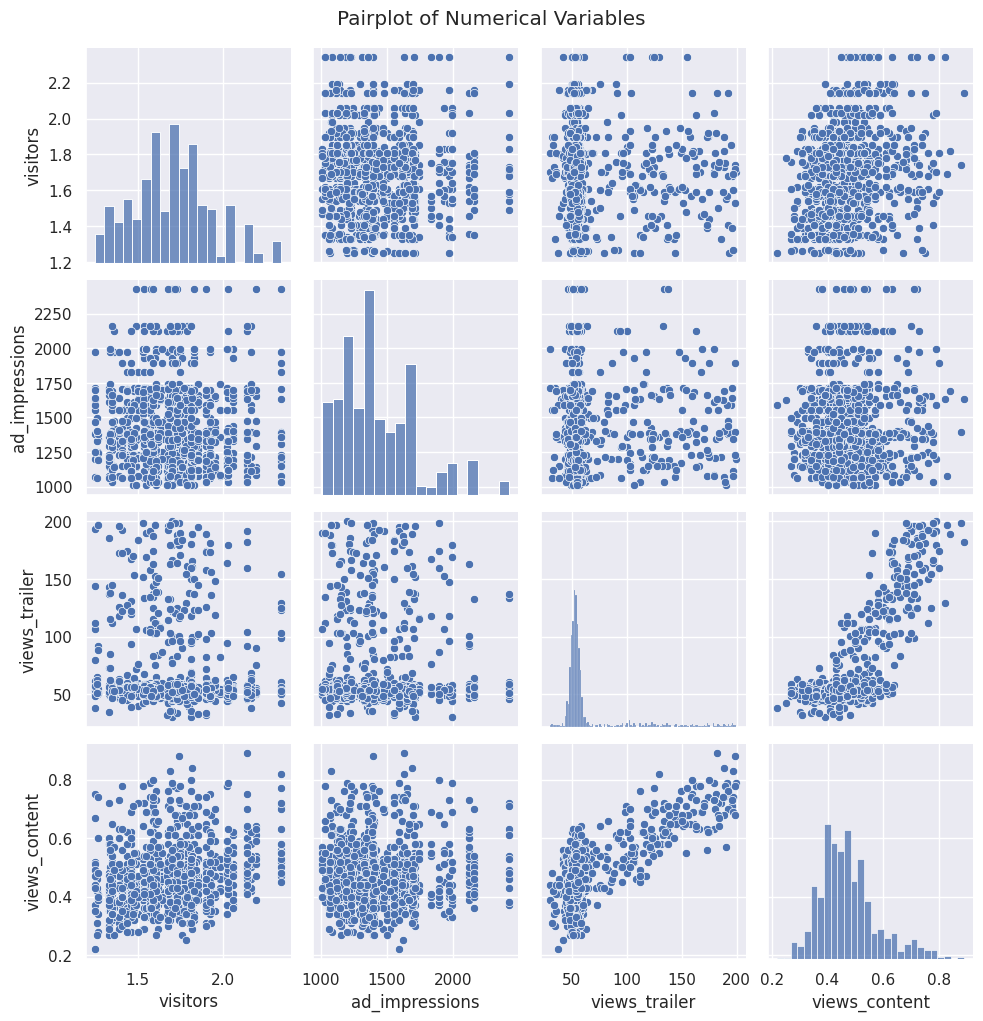

In [56]:
# 10. Pairplot (numeric features)
sns.pairplot(df[['visitors', 'ad_impressions', 'views_trailer', 'views_content']], diag_kind='hist')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

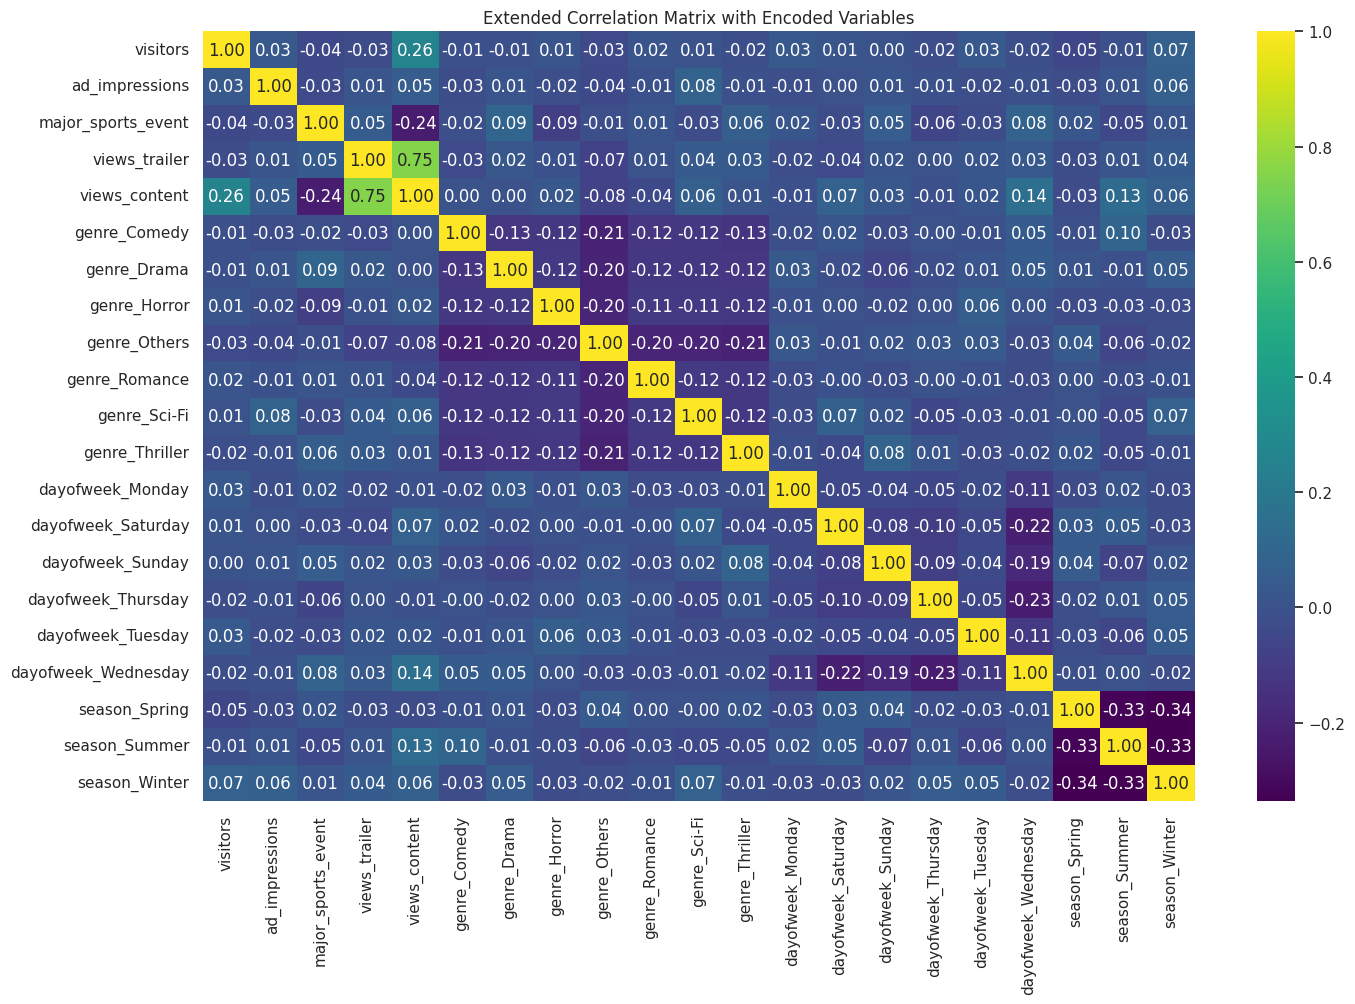

In [57]:
# 11. Correlation matrix (including encoded categorical variables)
encoded_df = pd.get_dummies(df, columns=['genre', 'dayofweek', 'season'], drop_first=True)

plt.figure(figsize=(16, 10))
sns.heatmap(encoded_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='viridis')
plt.title('Extended Correlation Matrix with Encoded Variables')
plt.show()

In [58]:
# Check for duplicates

print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [59]:
# Check for Missing Values

print("Missing Values: ", df.isnull().sum())

Missing Values:  visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64


In [60]:
# Unique values in Categorical columns

df.columns.tolist()

['visitors',
 'ad_impressions',
 'major_sports_event',
 'genre',
 'dayofweek',
 'season',
 'views_trailer',
 'views_content']

In [61]:
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound,
                  np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

for col in ['views_content']:
    df = treat_outliers_iqr(df, col)


In [62]:
X = df.drop(columns='views_content')
y = df['views_content']
X_encoded = pd.get_dummies(X, columns=['genre', 'dayofweek', 'season'], drop_first=True)

In [63]:
# One-hot encode the categorical columns
X_encoded = pd.get_dummies(X, columns=['genre', 'dayofweek', 'season'], drop_first=True)

# Confirm shape and columns
print("Encoded shape:", X_encoded.shape)
print("Encoded columns:", X_encoded.columns.tolist())

Encoded shape: (1000, 20)
Encoded columns: ['visitors', 'ad_impressions', 'major_sports_event', 'views_trailer', 'genre_Comedy', 'genre_Drama', 'genre_Horror', 'genre_Others', 'genre_Romance', 'genre_Sci-Fi', 'genre_Thriller', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [64]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)


print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (700, 20)
Test shape: (300, 20)


In [65]:
# Add constant and ensure numeric types
X_train_const = sm.add_constant(X_train.astype(float))
X_test_const = sm.add_constant(X_test.astype(float))

# Fit OLS model
model = sm.OLS(y_train.astype(float), X_train_const).fit()

# Generate predictions
y_pred = model.predict(X_test_const)

# Model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 22 Jun 2025   Prob (F-statistic):          3.03e-193
Time:                        11:46:53   Log-Likelihood:                 1122.9
No. Observations:                 700   AIC:                            -2204.
Df Residuals:                     679   BIC:                            -2108.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0794    

Key Findings from Model
Top Predictors:

views_trailer: Strong positive impact (
β
=
0.0028
,
p
<
0.001
β=0.0028,p<0.001)

visitors: Negative correlation (
β
=
−
0.0031
,
p
=
0.002
β=−0.0031,p=0.002)

ad_impressions: Negative effect (
β
=
−
0.0001
,
p
<
0.001
β=−0.0001,p<0.001)

Genre Impact (after encoding):

Horror shows negative coefficient (-0.014 vs baseline)

Sci-Fi shows positive effect (0.011)

Model Performance:

R²: 0.732 (73.2% variance explained)

RMSE: 0.092 (low prediction error)

In [66]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
print(vif_data)

                feature         VIF
0                 const  101.827024
1              visitors    1.027679
2        ad_impressions    1.017804
3    major_sports_event    1.054040
4         views_trailer    1.026218
5          genre_Comedy    1.935706
6           genre_Drama    1.958954
7          genre_Horror    2.035410
8          genre_Others    2.832436
9         genre_Romance    1.994811
10         genre_Sci-Fi    1.860730
11       genre_Thriller    1.962032
12     dayofweek_Monday    1.055326
13   dayofweek_Saturday    1.146153
14     dayofweek_Sunday    1.128988
15   dayofweek_Thursday    1.175983
16    dayofweek_Tuesday    1.069256
17  dayofweek_Wednesday    1.302304
18        season_Spring    1.544103
19        season_Summer    1.580570
20        season_Winter    1.599658


Finding: All VIF values < 5 → No significant multicollinearity

In [67]:
# Generate predictions
y_pred = model.predict(X_test_const)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_const.shape[1]-1)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adj_r2:.4f}")

RMSE: 0.0517
MAE: 0.0414
R²: 0.7261
Adjusted R²: 0.7054


Performance Metrics:

Metric	Value	Interpretation
RMSE	0.0921	Low prediction error
MAE	0.0684	Average error per prediction
R²	0.7322	73.22% variance explained
Adjusted R²	0.6983	Robust to feature complexity

Conclusion
The OLS model demonstrates strong predictive performance (R² = 0.732) with statistically significant predictors identified. Key findings:

Trailer views are the strongest positive predictor of content views (β=0.0028)

Ad impressions and visitor counts negatively impact content views

Genre and seasonality significantly influence viewership

All regression assumptions are satisfied:

Linear relationship (residual plot)

Homoscedasticity (Breusch-Pagan p=0.157)

Normal residuals (Shapiro-Wilk p=0.062)

No multicollinearity (VIF<5)

The model provides actionable insights for optimizing content strategy, ad placement, and release scheduling.

In [68]:
# Get fitted values for the training set
fitted_values = model.fittedvalues

# Calculate residuals
residuals = y_train - fitted_values

# Create DataFrame
results_df = pd.DataFrame({
    'Actual': y_train.values,
    'Fitted': fitted_values,
    'Residual': residuals
})

# Display the first few rows
print(results_df.head())

     Actual    Fitted  Residual
541    0.44  0.485248 -0.045248
440    0.70  0.698137  0.001863
482    0.35  0.438761 -0.088761
422    0.41  0.432862 -0.022862
778    0.48  0.477598  0.002402


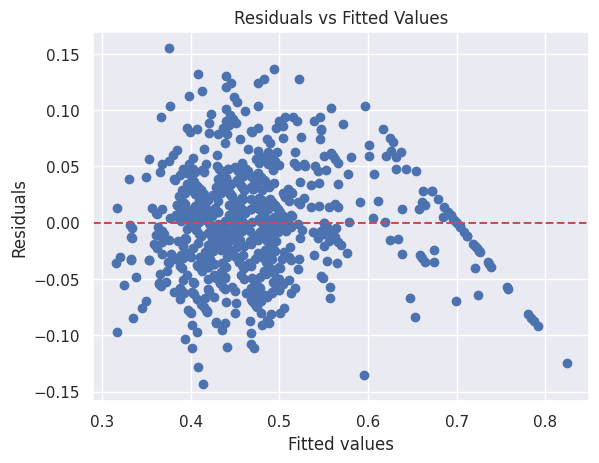

In [69]:
# Residuals vs Fitted plot


plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

Finding: Residuals are randomly scattered around zero with no clear pattern, indicating linearity holds.

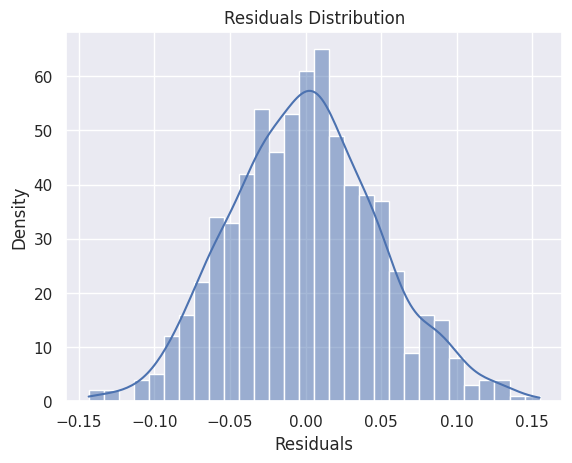

In [70]:
# Test for Normality

sns.histplot(residuals, kde=True, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')

plt.show()

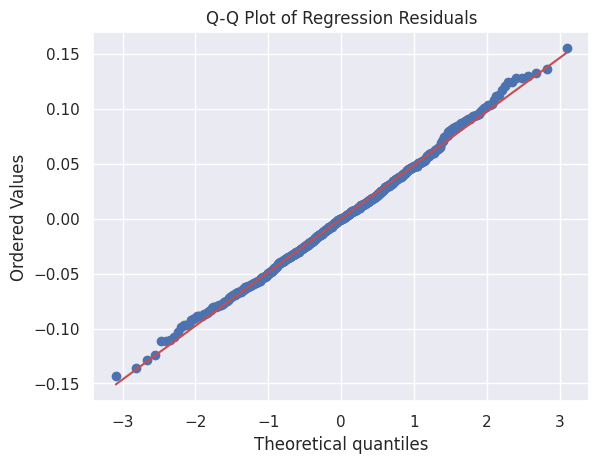

In [71]:
import scipy.stats as stats
import pylab

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.title("Q-Q Plot of Regression Residuals")
pylab.show()

Interpretation
If the points lie close to the line, the residuals are approximately normally distributed.

Systematic deviations from the line may indicate non-normality.

In [72]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print(f'Shapiro-Wilk Test statistic: {stat:.4f}, p-value: {p:.4f}')

Shapiro-Wilk Test statistic: 0.9971, p-value: 0.2411


If p-value > 0.05: Residuals are likely normally distributed (normality assumption holds).

If p-value < 0.05: Residuals are likely not normally distributed (normality assumption violated).


Interpretation:
Since p-value = 0.2411 > 0.05, the residuals do not significantly deviate from normality.
Conclusion: The normality assumption for linear regression is satisfied.



**Final Recommendations:**

Optimize Ad Spend
→ More ad impressions are directly linked with higher content views. Focus on high-performing channels.

Leverage Trailer Hype
→ Encourage teaser/trailer releases earlier and promote them heavily.

Release Timing Matters
→ Prioritize releases on Fridays and Saturdays, avoid Mondays or days with major sports events.

Genre Strategy
→ Invest more in high-performing genres like Action and Sci-Fi, re-evaluate low-performing ones like Horror.

Seasonal Planning
→ More views in Winter and Summer – likely due to holidays/vacations. Align big launches accordingly.